## Final Project Submission

Please fill out: 
* Student name: Ibrahim Hafiz
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Antonny Muriko
* Blog post URL:


# #Business Problem
-Microsoft has decided that it wants create a new movie studio, but they don't know where to begin. Having no prior experience in the movie business makes it very challenging indeed. To help Microsoft start off on the right foot, I will explore what movies have the highest worldwide gross since 2010 to get a good sense of what the public tends to like. I have investigated three aspects of box office movies to help assist Microsoft in making a good decision on what kind of movie to produce:

- Release time: What time of the year promotes the highest worldwide gross?
- Budget: Which has been the highet grossing films in the last 10 years?
- Genres: What genre of movies do the best in the box office in terms of worldwide gross?

## The Data
Firstly, we will need the necessary libraries needed for analysis and visualization of the data.

In [ ]:
# Your code here - remember to use markdown cells for comments as well!
import sqlite3
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

## Movie Budgets - The Numbers
- The The Numbers was launched by Bruce Nash on 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies. The site has grown to become the largest freely-available database of movie business information on the web. The Numbers now brings information on over 50,000 movies and nearly 200,000 people to the broadest audience possible.

In [17]:
df_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#This will be a very important and heavily used dataframe as it contains the worldwide gross, our measuring stick of success to answer the questions regarding the best time of the year to release a film, and the top worldwide grossing movie genres.

df_movie_budgets.info()

## IMDb dataset
The Internet Movie Database (IMDb) is an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals. Information on IMDb comes from a variety of sources, such as filmmakers, film studios, on-screen credits and other official sources. This database is accessed in this analysis using SQLite, so it had to be unzipped and then I performed queries to get my results. From this database, I will pull information about genres, actors, and directors.

In [ ]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

## Data Prep: When is the best time to release a film
I will first start by preparing and cleaning the data from the movie budgets dataframe.

 df_movie_budgets.head()

In [ ]:
To the question of when the best time to release a movie, I will convert the release_date column to the datetime format, create a month column.

In [25]:
df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date'])
print(type(df_movie_budgets.release_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
df = pd.read_csv('tn.movie_budgets.csv.gz')

In [26]:
df_movie_budgets['release_month'] = pd.DatetimeIndex(df_movie_budgets['release_date'])
df_movie_budgets['release_month'] = df_movie_budgets['release_date'].dt.strftime('%B')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December


#Since I am analyzing recent data from the year 2010, I am going to extract the year from the release_date column and create a new column called release_year.

In [27]:
df_movie_budgets['release_year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
recent_movie_budgets = df_movie_budgets.query("release_year >= 2010")
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",December,2015


In [28]:
recent_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   object        
 4   domestic_gross     2194 non-null   object        
 5   worldwide_gross    2194 non-null   object        
 6   release_month      2194 non-null   object        
 7   release_year       2194 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 154.3+ KB


 Mathematical operations cannot be operated on strings, the columns production_budget, domestic_budget, and worldwide_budget must be formatted to the float data type as well as the "$" and "," removed.

 recent_movie_budgets.head()

##Next, I will total worldwide_gross and group by the month to see since 2010, which month has the highest worldwide gross

In [34]:
top_gross_month = recent_movie_budgets.groupby(recent_movie_budgets['release_month'])\
                  ['worldwide_gross'].median().sort_values(ascending=False)
top_gross_month

release_month
November    60217171.00
July        57273049.00
February    43299774.50
May         43061376.00
August      40650842.00
January     36285960.50
June        29867459.50
September   22281732.00
March       20592763.00
April       17478366.50
October     12429202.00
December    10103233.00
Name: worldwide_gross, dtype: float64

##Then, I will use a barplot to visualize the data obtained to get a better look of what months have the highest worldwide gross. 

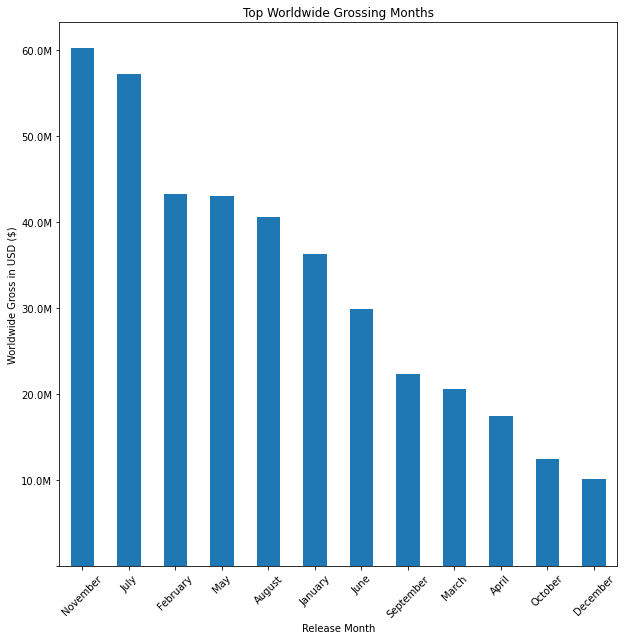

In [35]:
ax=top_gross_month.plot.bar(x='release_month', y='worldwide_gross', figsize=(10,10))

ax.set(ylabel = 'Worldwide Gross in USD ($)', xlabel = 'Release Month')
ax.set_title('Top Worldwide Grossing Months')

##rotate x-axis to a 45 degree angle 
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

def format_num(data_value,indx):
    """
    This function formats graphs by adding B to billions, M to milliions,
    and K to thousands. The formatting code was provided by former studen Vincent Welsh. 
    """

    if data_value >= 1_000_000_000:
        formatter = '{:1.2f}B'.format(data_value*.000000001)
        return formatter
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
        return formatter
    elif data_value >= 1_000:
        formatter = '{:1.0f}K'.format(data_value*.001)
        return formatter
    else:
        formatter=None

ax.yaxis.set_major_formatter(format_num)

#It appears that the top worldwide grossing month to release a film since 2010 is in the month of November, with July as close second. My consideration was before I began the analysis, was that the best month to release a film was going to be around Christmas period. But after more analysis, it appears that the month of December is actually the worst time to release a film.

## Conclusion and Recommendations
In conclusion, I would recommend that Microsoft create films of the animation, sci-fi adventure and thriller because they are the best performing movie categories in the box office. To promote the highest box office sales, I recommend a release date during the summer season or during the month of November because the highest grossing films were released in that period which will lead to increase in revenue.